# Introduction to R & Jupyter Notebooks
# Data Manipulation

Matthew D. Turner, PhD  
Georgia State University

Some rights reserved: [cc by-nc-sa](https://creativecommons.org/licenses/by-nc-sa/4.0/) See bottom of document for details.
***
In this section of the workshop we will look at the related problems of

+ Data Frames
+ Loading Data
+ Referencing Data
+ Indexing
+ Subsetting Data

This is a little boring but it is usually 90% of the work you have to do in data-oriented research, so we need to get it right. Bear with me.

## 3.1 Data Frames
The primary way to hold data sets in R is with a **data frame**. A data frame is basically a little spreadsheet that you can manipulate and refer to in other calculations. Let's look at some examples.

Previously you loaded the `datasets` package that contains a lot of little data frames to let you experiment with techniques. Let's use that again.

In [ ]:
# Load the datasets package and list the data sets (you've seen this before!)

library(datasets)
# library(help = "datasets")  # Uncomment this line to see the list of data again

Let's start with something that is **not** a data frame so that we have a comparison. R has various data types and some items work well as one type an not as others. One specialized type is a **time series** data set.

In [ ]:
data(discoveries)    # Load the data
discoveries          # Typing its name shows us the data on the screen

This data set is the count of "important" discoveries per year, for the years from 1860 to 1959. To learn more about the data set, you could type `?discoveries` but don't bother, the people who added this to R did not know what "important" meant, either.

Time series is usually best viewed as a plot. For many data sets, R will make reasonable default plots. For a time series like this, you can literally just say `plot(discoveries)` and the result is not bad.

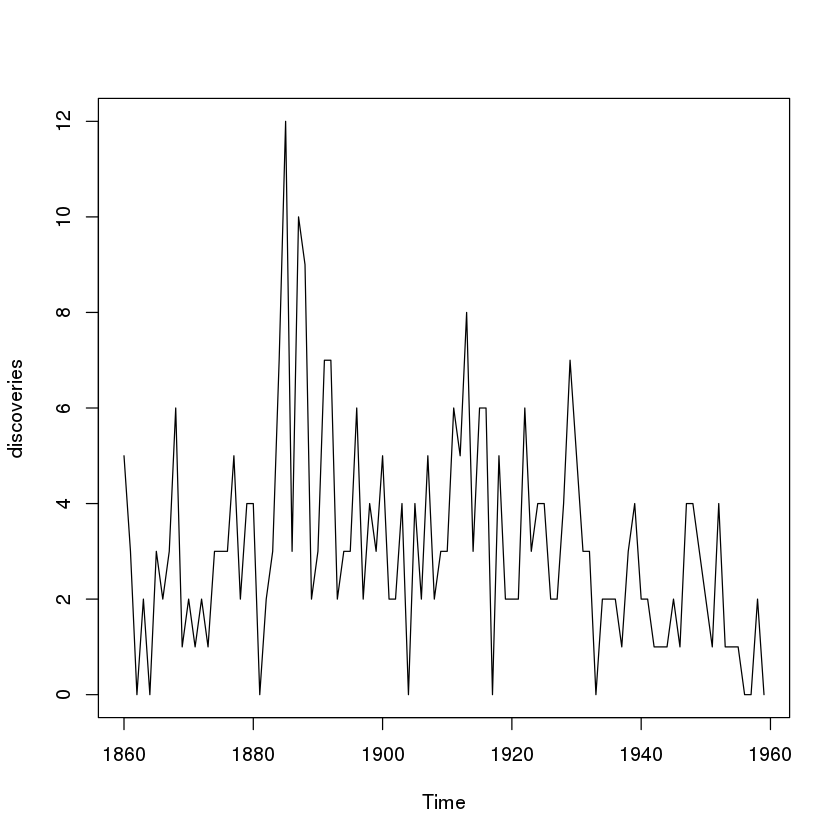

In [1]:
plot(discoveries)

Now that is way too big for some laptop screens. So let's tune the options. 

> **Note!** If the plot above is already reduced in size (so that it looks the same as the next one) then your current session of R is still using options set from a previous run of something. It happened to me, too. Nothing bad has happened. I just did not want you staring at two identical plots and wondering what you were missing.

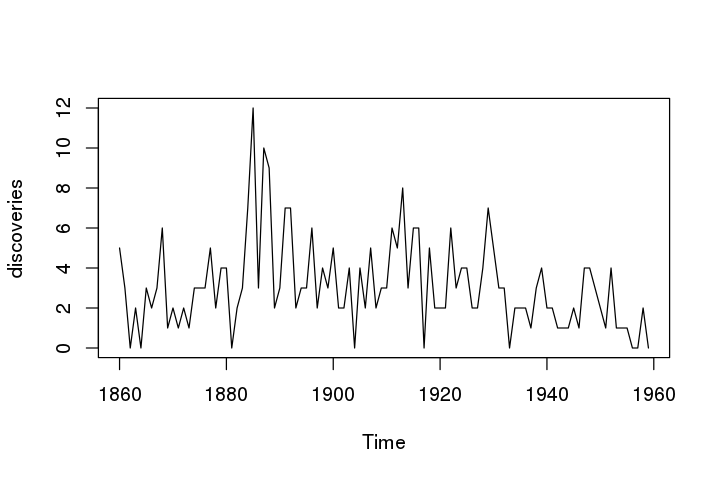

In [2]:
options(repr.plot.width=6, repr.plot.height=4) # Set plot height and width (in inches)
plot(discoveries)

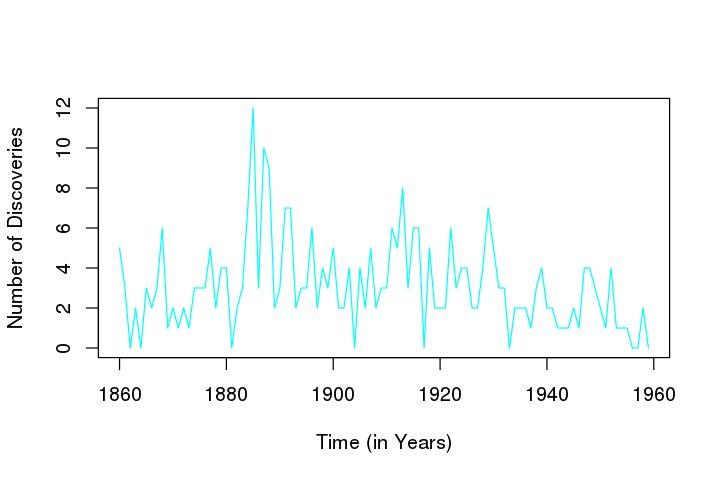

In [3]:
# We can also clean up the titles and make the figure "pretty"
# See if you can figure this out before you press shift-enter to run it

plot(discoveries, xlab = 'Time (in Years)', ylab = 'Number of Discoveries', col = "cyan")

Time series are special, usually in data sets we need to have multiple columns, one for each variable, and multiple rows, one for each observation (subject/object/thing/trial/etc.) Remember that, it is the usual format for statistics: **columns are variables** and **rows are observational units**. This is how data frames are organized. Let's see one &emdash; we will start with the famous _Motor Trend_ Cars dataset. 

In [4]:
data(mtcars)   # Load the data (for some data sets this is optional)
head(mtcars)   # Head shows the first few rows of a data frame
dim(mtcars)    # Short for dimension
               # Gives the number of ROWS (cars in this case) and COLS (measurements on cars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


[1] 32 11

Compare this to the `doscoveries` time series. Here we have different models of car, and for each car we have miles per gallon (mpg), number of cylinders in the engine (cyl), horse power (hp), and type of transmission (am; 0 = automatic, 1 = manual), among other variables.

The data frame is an easy way to keep the measurements on each car together with the name of the car. We can refer to each row or column in a variety of ways, and we can pick out the bits of the data frame that we want and ignore the rest.

> **Important Note** Look carefully are the next example and notice that it uses square brackets `[` and `]`, while functions (above) use the round ones, `(` and `)`. It is important to use round for functions and square for indexing. You **will** eventually mess this up, it happens to all of us.

In [5]:
# Pick out 1st row:

mtcars[1,]   # Note the comma and the nothing after it! and the SQUARE brackets

# The first 5 rows:

mtcars[1:5,] # Remember the colon operator from before? You could use seq here, too!

# The first column of measurements:

mtcars[,1]   # Note the comma and the empty space for row
             #    Also, this is formatted differently

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

In [ ]:
# Slightly more advanced exercise!
#
# Pick out the ODD rows from the data frame
# Hint (1): Use the seq function from before for the rows
# Hint (2): You need to know the number of rows to make this work
# Hint (3): Remember to use the correct brackets (square or round)



Remember when I said that `seq` stopping early would help you out? Someday it will dawn on you why that was important here. If it hasn't already.

You can refer to columns by name:

In [6]:
mtcars[,"mpg"]  # This list is the same as the one above

# Use c() -- catenate -- to make a list of columns you want:

mtcars[, c("mpg", "hp", "am")]  # This drops the other columns

newcar <- mtcars[, c("mpg", "hp", "am")]  # What does this do?

[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

,mpg,hp,am
Mazda RX4,21.0,110,1
Mazda RX4 Wag,21.0,110,1
Datsun 710,22.8,93,1
Hornet 4 Drive,21.4,110,0
Hornet Sportabout,18.7,175,0
Valiant,18.1,105,0
Duster 360,14.3,245,0
Merc 240D,24.4,62,0
Merc 230,22.8,95,0
Merc 280,19.2,123,0


One function you will use a lot is `summary`. When applied to data frames, it gives a quick statistical summary of the variables. For people who come from disciplines the use the mean and standard deviation, this output may seem weird. 

For each **numerical** variable, R gives the minimum, maximum, median, first quartile, and third quartile. In the original language this is all that was given, but over time the mean was squeezed into the list as well.

In [7]:
summary(newcar)

      mpg              hp              am        
 Min.   :10.40   Min.   : 52.0   Min.   :0.0000  
 1st Qu.:15.43   1st Qu.: 96.5   1st Qu.:0.0000  
 Median :19.20   Median :123.0   Median :0.0000  
 Mean   :20.09   Mean   :146.7   Mean   :0.4062  
 3rd Qu.:22.80   3rd Qu.:180.0   3rd Qu.:1.0000  
 Max.   :33.90   Max.   :335.0   Max.   :1.0000  

To get the means (`mean` function) and standard deviations (the `sd` function) you have to pick out the whole variable, that is, you cannot apply these to the whole data frame.

In [ ]:
# Obtain the mean and standard deviation of the mpg variable in the mtcars
# data frame; remember you have to pick out the variable like you did above



In [9]:
mean(mtcars[,"mpg"])

[1] 20.09062

In [10]:
mean(mtcars$mpg)

[1] 20.09062

In [ ]:
mtcars["Mazda RX4",]

In [ ]:
?mtcars  am	Transmission (0 = automatic, 1 = manual

## 3.2 Loading Data
In this workshop we will focus on the most basic method of loading data, reading it in from a CSV file. This is generally the preferred method in R for data sets that are on the order of 100 MB or less. If you work with massive data, there are specialized add-ons for dealing with the bespoke data types for those sorts of problems.

## 3.3 Referencing Data
Once you have gotten all of your data into a data frame, it is time to analyze it. To do that we need to be able to refer to it in other places. Data inside of R data frames has a name (the variable) and an address (the data frame name). You usually need to use both to be exact.

R assumes that you will often have more than one data set loaded at once, because real statistical problems rarely all fit into just one data set.

## 3.4 Indexing
Within each data frame there is an implied set of coordinates, like latitude and longitude. But in frames, it is **row** and **column**. R has methods for working with data's coordinates directly.

In addition, R allows the columns to be referenced by names.

Rows can be, too, but this is vestigal!

### 3.4.? Logical Indices
R allows you to use an ordered list of truth values to index a data frame. This seems weird, but like a lot of weird things, it turns out to be useful.

## 3.5 Subsets
We can use indices to make subsets. R will allow us to feed a data frame or variable a bunch of indices and it is incredibly flexible. We can use logical indices 

## 2.6 Data Frames and Indexing

Lists are great but in most problems we have many variables and many observations. A spreadsheet would be better for this. Let's make one.

R provides many built-in data sets for practice and demonstration of statistical techniques. You can run `library(help = "datasets")` to get a list and then get help for each specific data set name to see the details. Most packages that get added to R will bring their own data in with them.

Here we use the **state** data. R provides lists of the various facts about states including their abbreviation (`states.abb`), their area (`states.area`; in square miles), and their region of the country (`state.region`; Northeast, South, North Central, West). We will put these together into a single data frame which has all three pieces of information for each state:

That histogram is too big for most laptop displays! We can change the plotting options: run and adjust the cell below until you are happy. Keep in mind that you may distort the view with some settings!

Note: `repr` is short for representation. Graphics in R can be output in a variety of formats, either as displays in a notebook or RStudio, or as files for inclusion in publications.

In [ ]:
options(repr.plot.width=5, repr.plot.height=4) # Set plot height and width (in inches)

In [ ]:
s <- data.frame(state = state.abb, region = state.region, area = state.area)

head(s)    # To see all of the states, just remove the 'head' function

options(scipen=999)     # Default value is 0 if you want to undo this

boxplot(area ~ region, data=s)

boxplot(area ~ region, data = s, ylim = c(0, 175000))

Now that we have the basics of data frames, indexing, and subsetting working, it is time to actually do some statistics. 

Version 1.0  
2018.06.06  

To contact the author, please email [mturner46@gsu.edu](mailto:mturner46@gsu.edu). Please contact me with recommendations for improvement or if you find any errors. This work may be adapted for any non-commercial purpose within the bounds of the license.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.